In [16]:
# DEMO: tweak weights & biases to get optimal value

import tensorflow as tf


In [17]:
var = (tf.random.uniform([5]))
print(var)
print(var.numpy()) # transform Tensor representation to numpy representation
# numpy - way to link python to C (math-intensive operations can be efficiently implemented in C - no overhead of OOP)
# Tensorflow is looking at our python desc of the model and figuring out which optimized C routines it should use for best perf with your hardware

tf.Tensor([0.3932866  0.3063197  0.5180268  0.42520416 0.8247771 ], shape=(5,), dtype=float32)
[0.3932866  0.3063197  0.5180268  0.42520416 0.8247771 ]


In [18]:
# def data_creation(w=20, b=10, n=100):
def data_creation(w=0.1, b=0.5, n=100):
    x = tf.random.uniform(shape=(n,))
    noise = tf.random.normal(shape=(n,), mean=0.0, stddev=0.01)
    y = x*w + b + noise
    return x.numpy(), y.numpy()

x, y = data_creation(n=100)

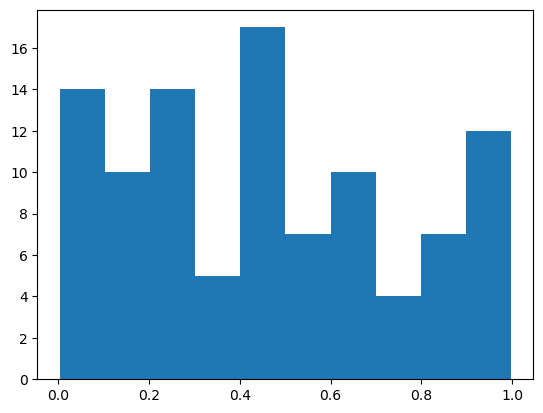

In [19]:
%matplotlib inline
import matplotlib.pyplot as mpl
mpl.hist(x)
mpl.show()

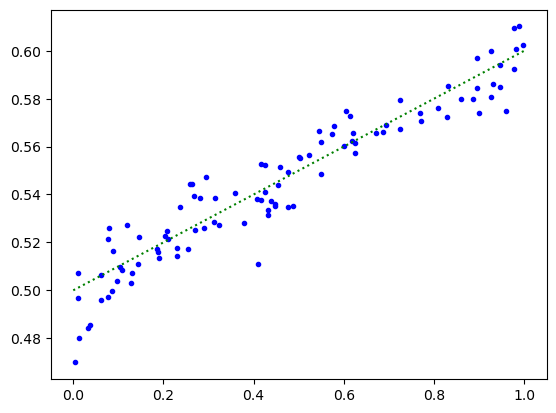

In [20]:
w=0.1
b=0.5
mpl.plot(x, y, 'b.')
mpl.plot([0, 1], [0*w+b, 1*w+b], 'g:')

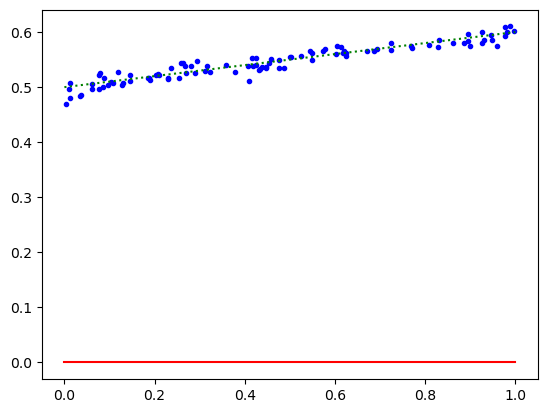

In [38]:
# scenario: 
# assume uniformly distributed random data for original val, sth we measured 
# line plotted by mpl.plot([0, 1], [0*w+b, 1*w+b], 'g:') with w==0.1, b==0.5 shows the true dependency btw those values - the ideal solution,
# but we don't know the weight and bias, and we're trying to guess what they are
# (basically the goal is to get the red line where the green line is currently

# say we start guessing from 0, only the starting vals are random - then we use
# gradient descent to adjust each guess val
w_guess = 0.0
b_guess = 0.0
mpl.plot(x, y, 'b.')
mpl.plot([0, 1], [0*w+b, 1*w+b], 'g:')
mpl.plot([0, 1], [0*w_guess+b_guess, 1*w_guess+b_guess], 'r')

In [39]:
# we need to figure out the error, how far we are from the solution;
# can measure distance btw actual data points and our line and sum them up
def predict(x, w=w_guess, b=b_guess):
    y = w*x + b
    return y

In [40]:
# get distance btw line and point, btw our prediction and actual val
def mean_squared_error(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred-y))
    

In [41]:
print(mean_squared_error(predict(x), y))

tf.Tensor(0.29734427, shape=(), dtype=float32)


In [42]:
w_guess = 0.1
b_guess = 0.5
print(mean_squared_error(predict(x), y))

tf.Tensor(0.29734427, shape=(), dtype=float32)


In [49]:
# declare initial w and b for tensorflow
w = tf.Variable(0.0)
b = tf.Variable(-1.0)

# to get to the solution, use differentiation, find way to change weight and bias to reduce the error
# also what neural networks do in backward propagation, so we'll try to reproduce those steps

# using gradient descent with small learning rate is an iterative approach that doesn't give
# the exact solution, but gets us close enough
# see https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html

# define learning rate
learning_rate = 0.1
steps = 200

# to get the direction for the next step, we need derivatives
# tensorflow can calculate all those derivatives automatically using GradientTape
# GradientTape class creates an env where tensorflow keeps track of math ops
for step in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(x, w=w, b=b)
        loss = mean_squared_error(predictions, y)

    gradients = tape.gradient(loss, [w, b])
    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if step%20==0:
        print ("Step {}".format(step))

Step 0
Step 20
Step 40
Step 60
Step 80
Step 100
Step 120
Step 140
Step 160
Step 180


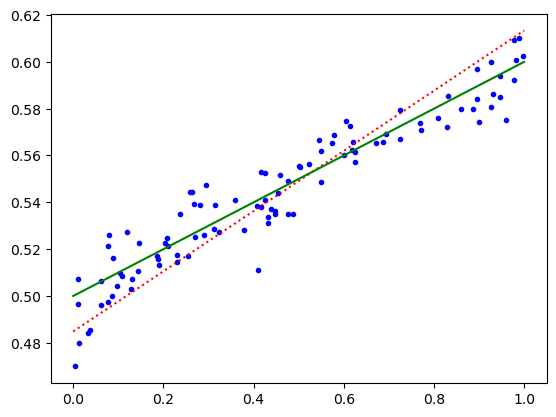

In [52]:
w_true = 0.1 # true vals used to initiate data 
b_true = 0.5
mpl.plot(x, y, 'b.')
mpl.plot([0, 1], [0*w+b, 1*w+b], 'r:')
mpl.plot([0, 1], [0*w_true+b_true, 1*w_true+b_true], 'g')

In [53]:
# n steps is just a const, how many calcs, 
# but learning rate determines whether we even get to the solution or not

# one-shot learning exploration method: 
# start w/ very small learning rate, then increase it a little bit w/ every step 
# to even start jumping out of the solution
# get optimal learning rate by plotting it with loss fn